<a href="https://colab.research.google.com/github/tompc35/ms274-modeling-marine-systems/blob/master/simple_climate_model_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Constructing a simple climate model

A simplified 0-D, time-varying model of the Earth's energy balance:

$\rho c_p H \frac{dT}{dt} = R -  bT$

* $T$ is the global average surface temperature (relative to pre-industrial) [C]
* $b$ is the climate sensitivity parameter [W m$^{-2}$ C$^{-1}$]
* $H$ is the ocean mixed layer depth [m]
* $R$ is radiative forcing [W m$^{-2}$]
* $\rho$ is the density of sea water [kg m$^{-3}$]
* $c_p$ is the specific heat capacity of seawater [J kg$^{-1}$ C$^{-1}$]

## Import libraries and download data



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

The data are in csv files on Github, which are downloaded automatically. One file contains radiative forcing data for the past climate during 1880-2006. The second file contains projections of radiative forcing under different IPCC scenarios of representative concentration pathways (RCPs). These datasets are loaded into Pandas dataframes.

In [3]:
!git clone https://github.com/tompc35/radiative-forcing-data.git data

data = pd.read_csv('data/climate_forcing_1880-2006.csv')
projections = pd.read_csv('data/climate_forcing_projected.csv')

fatal: destination path 'data' already exists and is not an empty directory.


## View the data

Each dataframe contains multiple variables, which can be thought of as the columns of a spreadsheet. Each row corresponds to a year.

* The dataframe called `data` contains one variables corresponding to the year, different categories of radiative forcing estimates, atmospheric CO2 concentrations and observed temperature. 

* The dataframe called `projections` contains estimates of radiative forcing for future times based on different scenarios.

The first few rows of each dataframe are displayed below.

In [4]:
data.head()

,Year,Volcano [W/m2],Solar [W/m2],Anthropogenic [W/m2],Total radiative forcing [W/m2],Carbon dioxide [ppm],Observed Temperature [C]
0,1879,0.202,-0.030,0.196,0.368,290,NaN
1,1880,0.216,-0.009,0.194,0.400,291,0.00
2,1881,0.223,0.011,0.196,0.429,291,0.07
3,1882,0.111,0.021,0.208,0.340,292,0.02
4,1883,-0.803,0.022,0.217,-0.564,292,0.01


In [5]:
projections.head()

,Year,Forcing RCP26 [W/m2],Forcing RCP45 [W/m2],Forcing RCP6 [W/m2],Forcing RCP85 [W/m2]
0,2007,1.950,1.952,1.937,1.961
1,2008,1.985,1.986,1.964,2.001
2,2009,2.077,2.075,2.046,2.099
3,2010,2.198,2.192,2.157,2.223
4,2011,2.283,2.269,2.230,2.301


## Plot historical data and projections

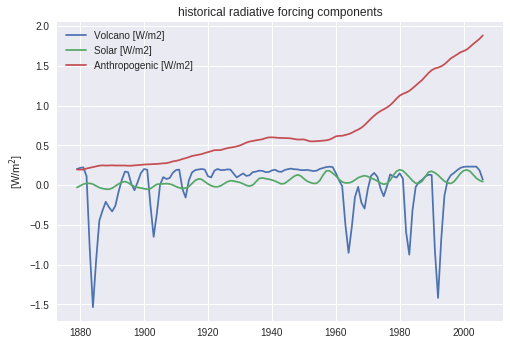

In [11]:
plt.figure()
plt.plot(data['Year'],data['Volcano [W/m2]'])
plt.plot(data['Year'],data['Solar [W/m2]'])
plt.plot(data['Year'],data['Anthropogenic [W/m2]'])
plt.ylabel('[W/m$^2$]')
plt.title('historical radiative forcing components')
plt.legend()

### Exercise #1: plot the total radiative forcing for historical time periods and all future climate scenarios on one plot.



In [0]:
# enter code here

## Define the model equations

A function is defined below to run the model, given parameter values and a time series of radiative forcing. The model equation is stepped forward in time using Euler's method. This function only needs to be defined once.

In [0]:
def run_model(rho,cp,H,b,R):
  '''
  Run a simple climate model.
  
  INPUTS:
  parameters - rho, cp, H, b (constants)
  radiative forcing - R (time series, one value per year)
  
  OUTPUT:
  temperature (time series, one value per year)
  
  '''
  
  # set up time parameters and initialize model with array of zeros
  nsteps = len(R)
  deltat = 365.25*24*60*60  # time step of one year (in seconds)
  T = np.zeros(nsteps)
  
  # loop through time steps and solve model equation
  for i in range(nsteps-1):
    dTdt = (R[i]-b*T[i])/(rho*cp*H)
    T[i+1] = T[i]+dTdt*deltat

  return T

## Define forcing scenario

Specify the time variable and radiative forcing to be used in the model. These should come from the same dataframe (`data` or `projections`).

In [0]:
time = data['Year']
Rtotal = data['Total radiative forcing [W/m2]']

## Define parameters

### Exercise #2: Experiment with parameters and try to find the best fit to the data

In [0]:
rho = 1025              # water density [kg/m^3]
cp = 3985               # specific heat capacity of seawater [J kg^-1 C^-1]
H =  # enter value      # ocean mixed layer depth [m]
b =  # enter value      # climate sensitivity [W m^-2 C^-1]

Run model and plot the results

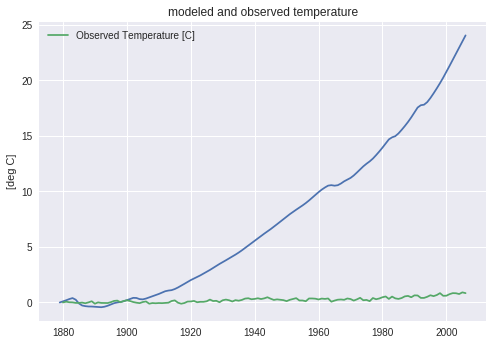

In [21]:
Tmodel = run_model(rho,cp,H,b,Rtotal)

plt.figure()
plt.plot(time,Tmodel)
plt.plot(data['Year'],data['Observed Temperature [C]'])
plt.title('modeled and observed temperature')
plt.ylabel('[deg C]')
plt.legend()

### Exercise #3: Compare modeled temperature over the past century for different components of forcing

* Solar forcing only
* Anthropogenic forcing only
* Solar + anthropogenic forcing only (no volcanos)

Use the same the `run_model` function, but with different inputs for the radiative forcing time series.  The model equations will remain the same, with different inputs, so there is no need to define the function again.

### Exercise #4: Compare modeled temperature for different IPCC projections of radiative forcing